In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [16]:
#API Request
#creating settings - Imperial settings gives Fahrenheit and MPH
settings = {"units": "imperial", "appid": api_key}

#set up weather_data as a list of data retrieved. Set up as a list of lists: 
#    City, Latitude, Longitude, Temperature (F), Humidity (%), Cloudiness (%), Wind Speed (mph)
weather_data_list=[]

print("Beginning Data Retrieval")

#citycount will tell us what record we are on
citycount=0

for city in cities:
    try:
        city_weather = ow.get_current(city, **settings)
        print(f"Processing record {citycount} of {len(cities)}: {city}")
        citycount=citycount+1

        #making a series of try statements so that if one of the first ones fail it keeps going (e.g. if there is no lat
        #data, it won't kick out to the "city record unretrievable" exception - it will continue to
        #retrieve all of the other data that it can (i.e. it will continue to look for lon instead of going to next city))
        #This might be unnecessary, if all cities have all of this data available
        try:
            lat = city_weather["coord"]["lat"]
        except:
            print(f"No lat information for {city} available")
            lat = ""
        
        try:
            lon = city_weather["coord"]["lon"]
        except:
            print(f"No lon information for {city} available")
            lon = ""            
            
        try:            
            temp = city_weather["main"]["temp_max"]
        except:
            print(f"No temp information for {city} available")
            temp = ""
            
        try:             
            humidity = city_weather["main"]["humidity"]
        except:
            print(f"No humidity information for {city} available")
            humidity = ""            
            
        try:                
            cloudiness = city_weather["clouds"]["all"]
        except:
            print(f"No cloudiness information for {city} available")
            cloudiness = ""                
            
        try:              
            windsp = city_weather["wind"]["speed"]
        except:
            print(f"No windsp information for {city} available")
            windsp = "" 
            
        weather_data_list.append([city,lat,lon,temp,humidity,cloudiness,windsp])
        
    except:
        print(f"City record unretrievable. Skipping.")
        citycount=citycount+1


Beginning Data Retrieval
Processing record 0 of 635: barrow
City record unretrievable. Skipping.
City record unretrievable. Skipping.
Processing record 3 of 635: albany
Processing record 4 of 635: yellowknife
Processing record 5 of 635: cape town
Processing record 6 of 635: kavaratti
Processing record 7 of 635: galesong
Processing record 8 of 635: lorengau
Processing record 9 of 635: nuuk
Processing record 10 of 635: bandarbeyla
Processing record 11 of 635: kapaa
Processing record 12 of 635: busselton
Processing record 13 of 635: rincon
Processing record 14 of 635: geraldton
Processing record 15 of 635: richards bay
Processing record 16 of 635: vaini
Processing record 17 of 635: hilo
City record unretrievable. Skipping.
City record unretrievable. Skipping.
City record unretrievable. Skipping.
Processing record 21 of 635: mataura
Processing record 22 of 635: hamilton
City record unretrievable. Skipping.
Processing record 24 of 635: mahebourg
Processing record 25 of 635: verkhnevilyuysk


Processing record 212 of 635: kozachi laheri
Processing record 213 of 635: makakilo city
Processing record 214 of 635: yatou
Processing record 215 of 635: cabedelo
Processing record 216 of 635: tuktoyaktuk
Processing record 217 of 635: yulara
Processing record 218 of 635: tall kayf
Processing record 219 of 635: zhigansk
Processing record 220 of 635: naica
Processing record 221 of 635: mabaruma
Processing record 222 of 635: chubbuck
Processing record 223 of 635: navahrudak
Processing record 224 of 635: pisco
Processing record 225 of 635: saskylakh
Processing record 226 of 635: ponta do sol
Processing record 227 of 635: yenagoa
Processing record 228 of 635: lazaro cardenas
Processing record 229 of 635: shihezi
Processing record 230 of 635: trapani
Processing record 231 of 635: matane
Processing record 232 of 635: poum
Processing record 233 of 635: traverse city
Processing record 234 of 635: ancud
Processing record 235 of 635: oksfjord
Processing record 236 of 635: tura
City record unretr

Processing record 422 of 635: canavieiras
Processing record 423 of 635: mangai
Processing record 424 of 635: samarai
Processing record 425 of 635: severo-yeniseyskiy
Processing record 426 of 635: tiznit
Processing record 427 of 635: mnogovershinnyy
Processing record 428 of 635: mvuma
Processing record 429 of 635: college
Processing record 430 of 635: vostok
Processing record 431 of 635: longyearbyen
Processing record 432 of 635: nampula
City record unretrievable. Skipping.
Processing record 434 of 635: yumen
Processing record 435 of 635: birjand
City record unretrievable. Skipping.
City record unretrievable. Skipping.
Processing record 438 of 635: barreirinha
City record unretrievable. Skipping.
Processing record 440 of 635: souillac
Processing record 441 of 635: nantucket
Processing record 442 of 635: manaure
Processing record 443 of 635: half moon bay
Processing record 444 of 635: taos
City record unretrievable. Skipping.
Processing record 446 of 635: namatanai
Processing record 447 

Processing record 633 of 635: constitucion
Processing record 634 of 635: lahaina


In [19]:
#printing to csv
weather_df=pd.DataFrame(weather_data_list,columns=["City Name","Latitude","Longitude","Temperature (F)",
                                                  "Humidity (%)","Cloudiness (%)","Wind Speed (MPH)"])
weather_df.to_csv("../APIHomework/WeatherOutput.csv")

In [20]:
weather_df.head()

,City Name,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,barrow,-38.31,-60.23,50.16,44,100,18.28
1,albany,42.65,-73.75,77.00,50,75,10.29
2,yellowknife,62.45,-114.38,53.60,76,75,24.16
3,cape town,-33.93,18.42,59.00,93,75,14.99
4,kavaratti,10.57,72.64,83.46,77,100,21.03


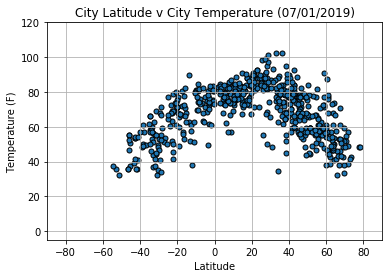

In [45]:
#LATITUDE V TEMPERATURE scatter plot
plt.scatter(x=weather_df["Latitude"],y=weather_df["Temperature (F)"],s=25,edgecolors="black")
plt.xlim(-90,90)
plt.ylim(-5,120)
plt.title("City Latitude v City Temperature (07/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")   
plt.grid()
plt.savefig("../APIHomework/Lat_v_Temp.png") 

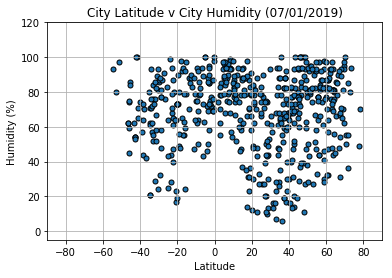

In [46]:
#LATITUDE V HUMIDITY scatter plot
plt.scatter(x=weather_df["Latitude"],y=weather_df["Humidity (%)"],s=25,edgecolors="black")
plt.xlim(-90,90)
plt.ylim(-5,120)
plt.title("City Latitude v City Humidity (07/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")   
plt.grid()
plt.savefig("../APIHomework/Lat_v_Humid.png") 

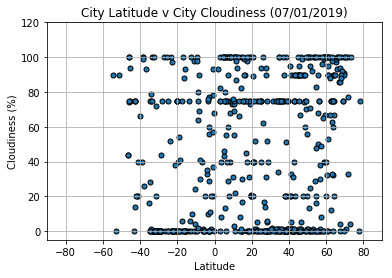

In [47]:
#LATITUDE V CLOUDINESS scatter plot
plt.scatter(x=weather_df["Latitude"],y=weather_df["Cloudiness (%)"],s=25,edgecolors="black")
plt.xlim(-90,90)
plt.ylim(-5,120)
plt.title("City Latitude v City Cloudiness (07/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")   
plt.grid()
plt.savefig("../APIHomework/Lat_v_Cloud.png") 

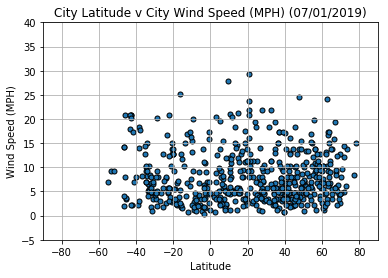

In [48]:
#LATITUDE V WINDSP scatter plot
plt.scatter(x=weather_df["Latitude"],y=weather_df["Wind Speed (MPH)"],s=25,edgecolors="black")
plt.xlim(-90,90)
plt.ylim(-5,40)
plt.title("City Latitude v City Wind Speed (MPH) (07/01/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")   
plt.grid()
plt.savefig("../APIHomework/Lat_v_WindSP.png") 

In [ ]:
#OBSERVABLE TRENDS

In [10]:
#JUST TEST CODE
#testing a query with Toronto
settings = {"units": "imperial", "appid": api_key}
rand_city = ow.get_current("Toronto",**settings)
rand_city

{'coord': {'lon': -79.39, 'lat': 43.65},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 74.41,
  'pressure': 1012,
  'humidity': 57,
  'temp_min': 71.01,
  'temp_max': 78.01},
 'visibility': 24140,
 'wind': {'speed': 16.11, 'deg': 160},
 'clouds': {'all': 75},
 'dt': 1562030806,
 'sys': {'type': 1,
  'id': 1002,
  'message': 0.0091,
  'country': 'CA',
  'sunrise': 1561973978,
  'sunset': 1562029370},
 'timezone': -14400,
 'id': 6167865,
 'name': 'Toronto',
 'cod': 200}

In [18]:
#testing navigation through the output
print(rand_city["name"])
print(rand_city["coord"]["lat"])
print(rand_city["coord"]["lon"])
print(rand_city["main"]["temp_max"])
print(rand_city["main"]["humidity"])
print(rand_city["clouds"]["all"])
print(rand_city["wind"]["speed"])

Toronto
43.65
-79.39
78.01
57
20
16.11


In [49]:
#OBSERVABLE TRENDS
#1. An easy one is that Temperature does in fact appear to be correlated with Latitude. In the first chart, there is clearly
# an increase in temperature near the equator - temperatures are highest at zero latitude, and decrease as latitude
# becomes negative or positive.
#2. Humidity appears to have a much weaker correlation with latitude - the scatter plot seems almost entirely uncorrelated,
# though there also appears to be a small "n" shaped gap near zero latitude. The least humid cities appear to be between
# -40 and -20 latitude, and 20 and 40 latitude. This could be a sample size problem (since this is hardly visible in
# the graph, so maybe this trend isn't real) - or it could be that humidity occurs at certain temperatures 
# (i.e. the hottest places along the equator get very humid, and the coldest places far away from the equator
# get humid, but medium-hot places a little off the equator have low humidity.)
# In order to be more sure about this trend, we would need to plot a higher sample size, or check it against historical data
#3. Cloudiness appears to be completely uncorrelated to latitude. Very cloudy places exist at all different latitudes.
# That is interesting as it means that cloudiness would probably not be very correlated with temperature either
# (since temperature is correlated with latitude). I would have thought that higher temperatures would cause higher
# cloudiness (evaporation) - but I am not a scientist - perhaps higher temperature = higher evaporation = more frequent
# raining, which means it gets cloudy and clears up quickly. Would need further data to conclude.